<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-7/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

## Visualizing a Deep Learning Model

Neural network models are often described as opaque, meaning they struggle to explain the rationale behind specific decisions or predictions. Convolutional neural networks (CNNs), designed to process image data, tend to be less inscrutable than other neural network types due to their structure and function.

These models consist of small linear filters, and the application of these filters generates outputs known as **activation maps** or, more broadly, **feature maps**. Both **filters** and feature maps can be visualized, offering a glimpse into the model's workings.

For instance, we can design and interpret small filters, such as line detectors. Visualizing the filters within a trained CNN may provide valuable insights into the model's behavior.

Moreover, the feature maps produced from applying filters to input images, as well as those generated from previous layers, can reveal the internal representation the model forms of a specific input at various stages

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Import all the necessary libraries for this project, including TensorFlow for the main framework, Matplotlib for visualization, scikit-learn (sklearn.metrics) for evaluation, NumPy for data manipulation, and itertools for iterating through the data.

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Load in the data
Split it into train and test sets
Transform input values to [0 , 1].

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
K = len(set(y_train))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


# Baseline model

In [3]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
response = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.3540 - loss: 1.7519 - val_accuracy: 0.5431 - val_loss: 1.2978
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.5327 - loss: 1.2953 - val_accuracy: 0.6089 - val_loss: 1.0899
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.5935 - loss: 1.1425 - val_accuracy: 0.6245 - val_loss: 1.0467
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.6288 - loss: 1.0329 - val_accuracy: 0.6554 - val_loss: 0.9600
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.6565 - loss: 0.9692 - val_accuracy: 0.6672 - val_loss: 0.9400
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.6777 - loss: 0.9100 - val_accuracy: 0.6834 - val_loss: 0.9024
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.6970 - loss: 0.8558 - val_accuracy: 0.6958 - val_loss: 0.8820
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7100 -

# Evaluate the model

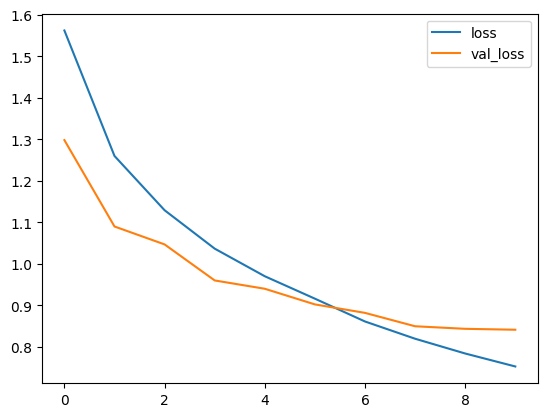

In [4]:
plt.plot(response.history['loss'], label='loss')
plt.plot(response.history['val_loss'], label='val_loss')
plt.legend()

##Visualization##

You can simply ask for a summary through `model.summary()` function.

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 15, 15, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,852,512 (14.70 MB)

 Trainable params: 1,284,170 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,568,342 (9.80 MB)

The learned filters are essentially **weights**. However, due to the specialized two-dimensional structure of these filters, the weight values have a spatial relationship to one another, making it meaningful to plot each filter as a two-dimensional image.

The model summary provides an overview of the output shape for each layer, such as the dimensions of the resulting feature maps. However, it does not indicate the shape of the filters (weights) within the network; it only specifies the total number of weights per layer.

We can access all the layers of the model using the `model.layers` property. Each layer has a `layer.name` property, where the convolutional layers are named using a format like `block#_conv#`, with the `‘#’` representing an integer. This allows us to check the name of each layer and skip any that do not include the string `‘conv’`.

Each convolutional layer contains two sets of weights: one for the block of filters and another for the block of bias values. These can be accessed using the `layer.get_weights()` function, enabling us to retrieve and summarize their shapes.

In [6]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)


Each layer has 3x3 filters.

We can observe that for the input image with three channels—red, green, and blue—each filter has a depth of three. We could visualize a single filter as a plot consisting of three images, one for each channel, compress all three into a single color image, or simply display the first channel and assume the others will resemble it. However, this approach becomes challenging when we consider the 63 additional filters that we might want to visualize.

To retrieve the filters from the first layer, we can proceed as follows

In [7]:
filters , bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Let's visualize 3 filters out of 32 filters from 1st layer.


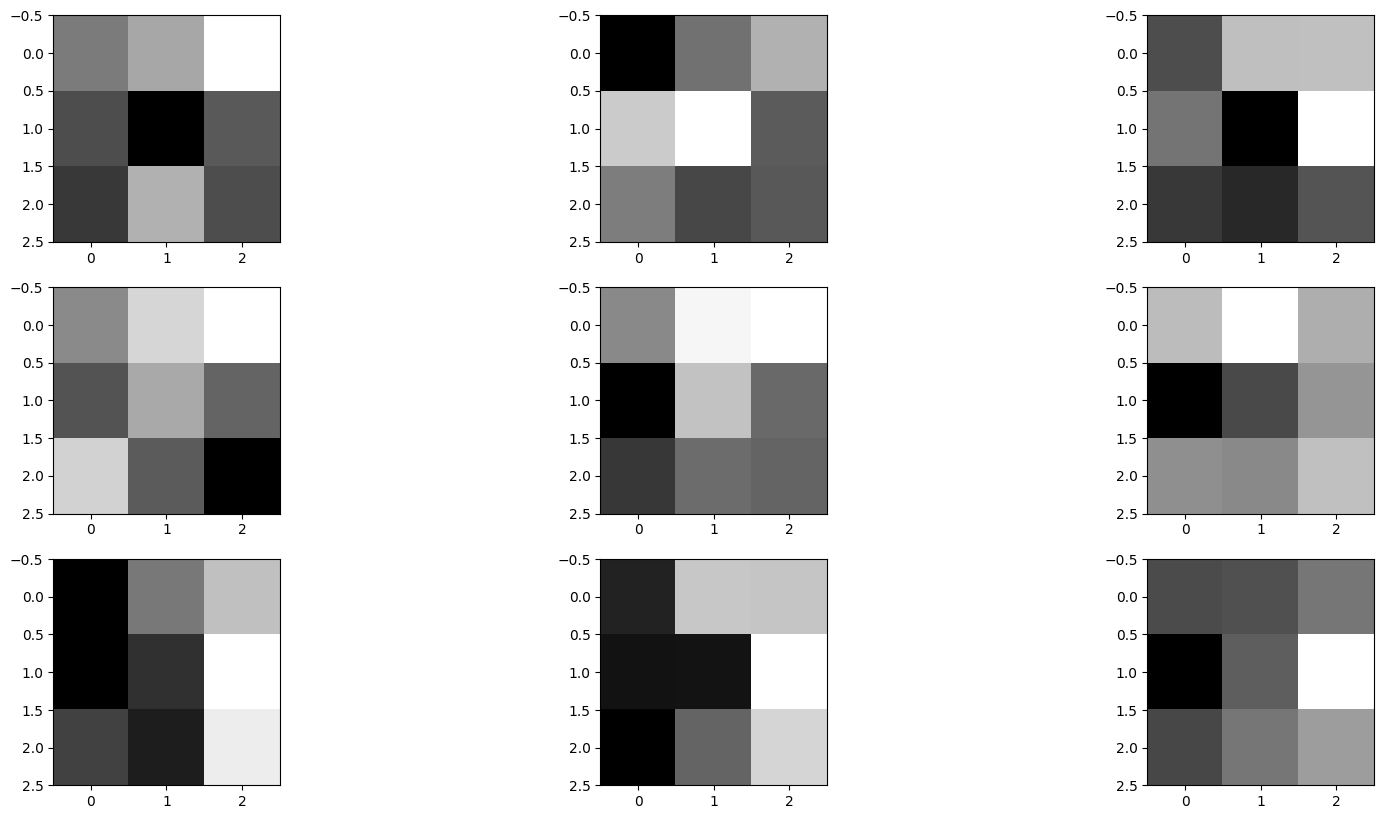

In [8]:
import matplotlib.pyplot as plt
n_filters =3
ix=1
fig = plt.figure(figsize=(20,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

The dark squares indicate small weights, while the light squares represent large weights. When examining the filters in the second convolutional layer, we see that there are again 64 filters; however, each filter has 32 channels to correspond with the input feature maps.

**Sample Image**

To visualize the model, we need to select a sample image from the test dataset, convert it to an array, and expand its dimensions to match the dataset format, resulting in a shape of (1, H, W, 3), but with only a single sample.

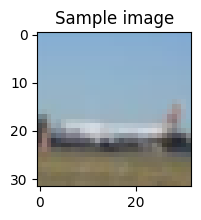

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array # This function converts an image into an array.

img = x_test[np.random.choice(x_test.shape[0])]

plt.figure(figsize=(2, 2), dpi=100)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title("Sample image");

image = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

**Visualizing Feature Maps**

The activation maps, known as feature maps, represent the results of applying filters to the input, such as an image or another feature map.

Visualizing a feature map for a specific input image allows us to understand which features of the input are detected or preserved. We would expect that feature maps closer to the input capture small or fine-grained details, while those nearer to the output of the model capture more general features.

The first step is to create a new model using the input of the original model and the output of the specific convolutional layer we want to visualize. Then we can dispay all given feature maps.

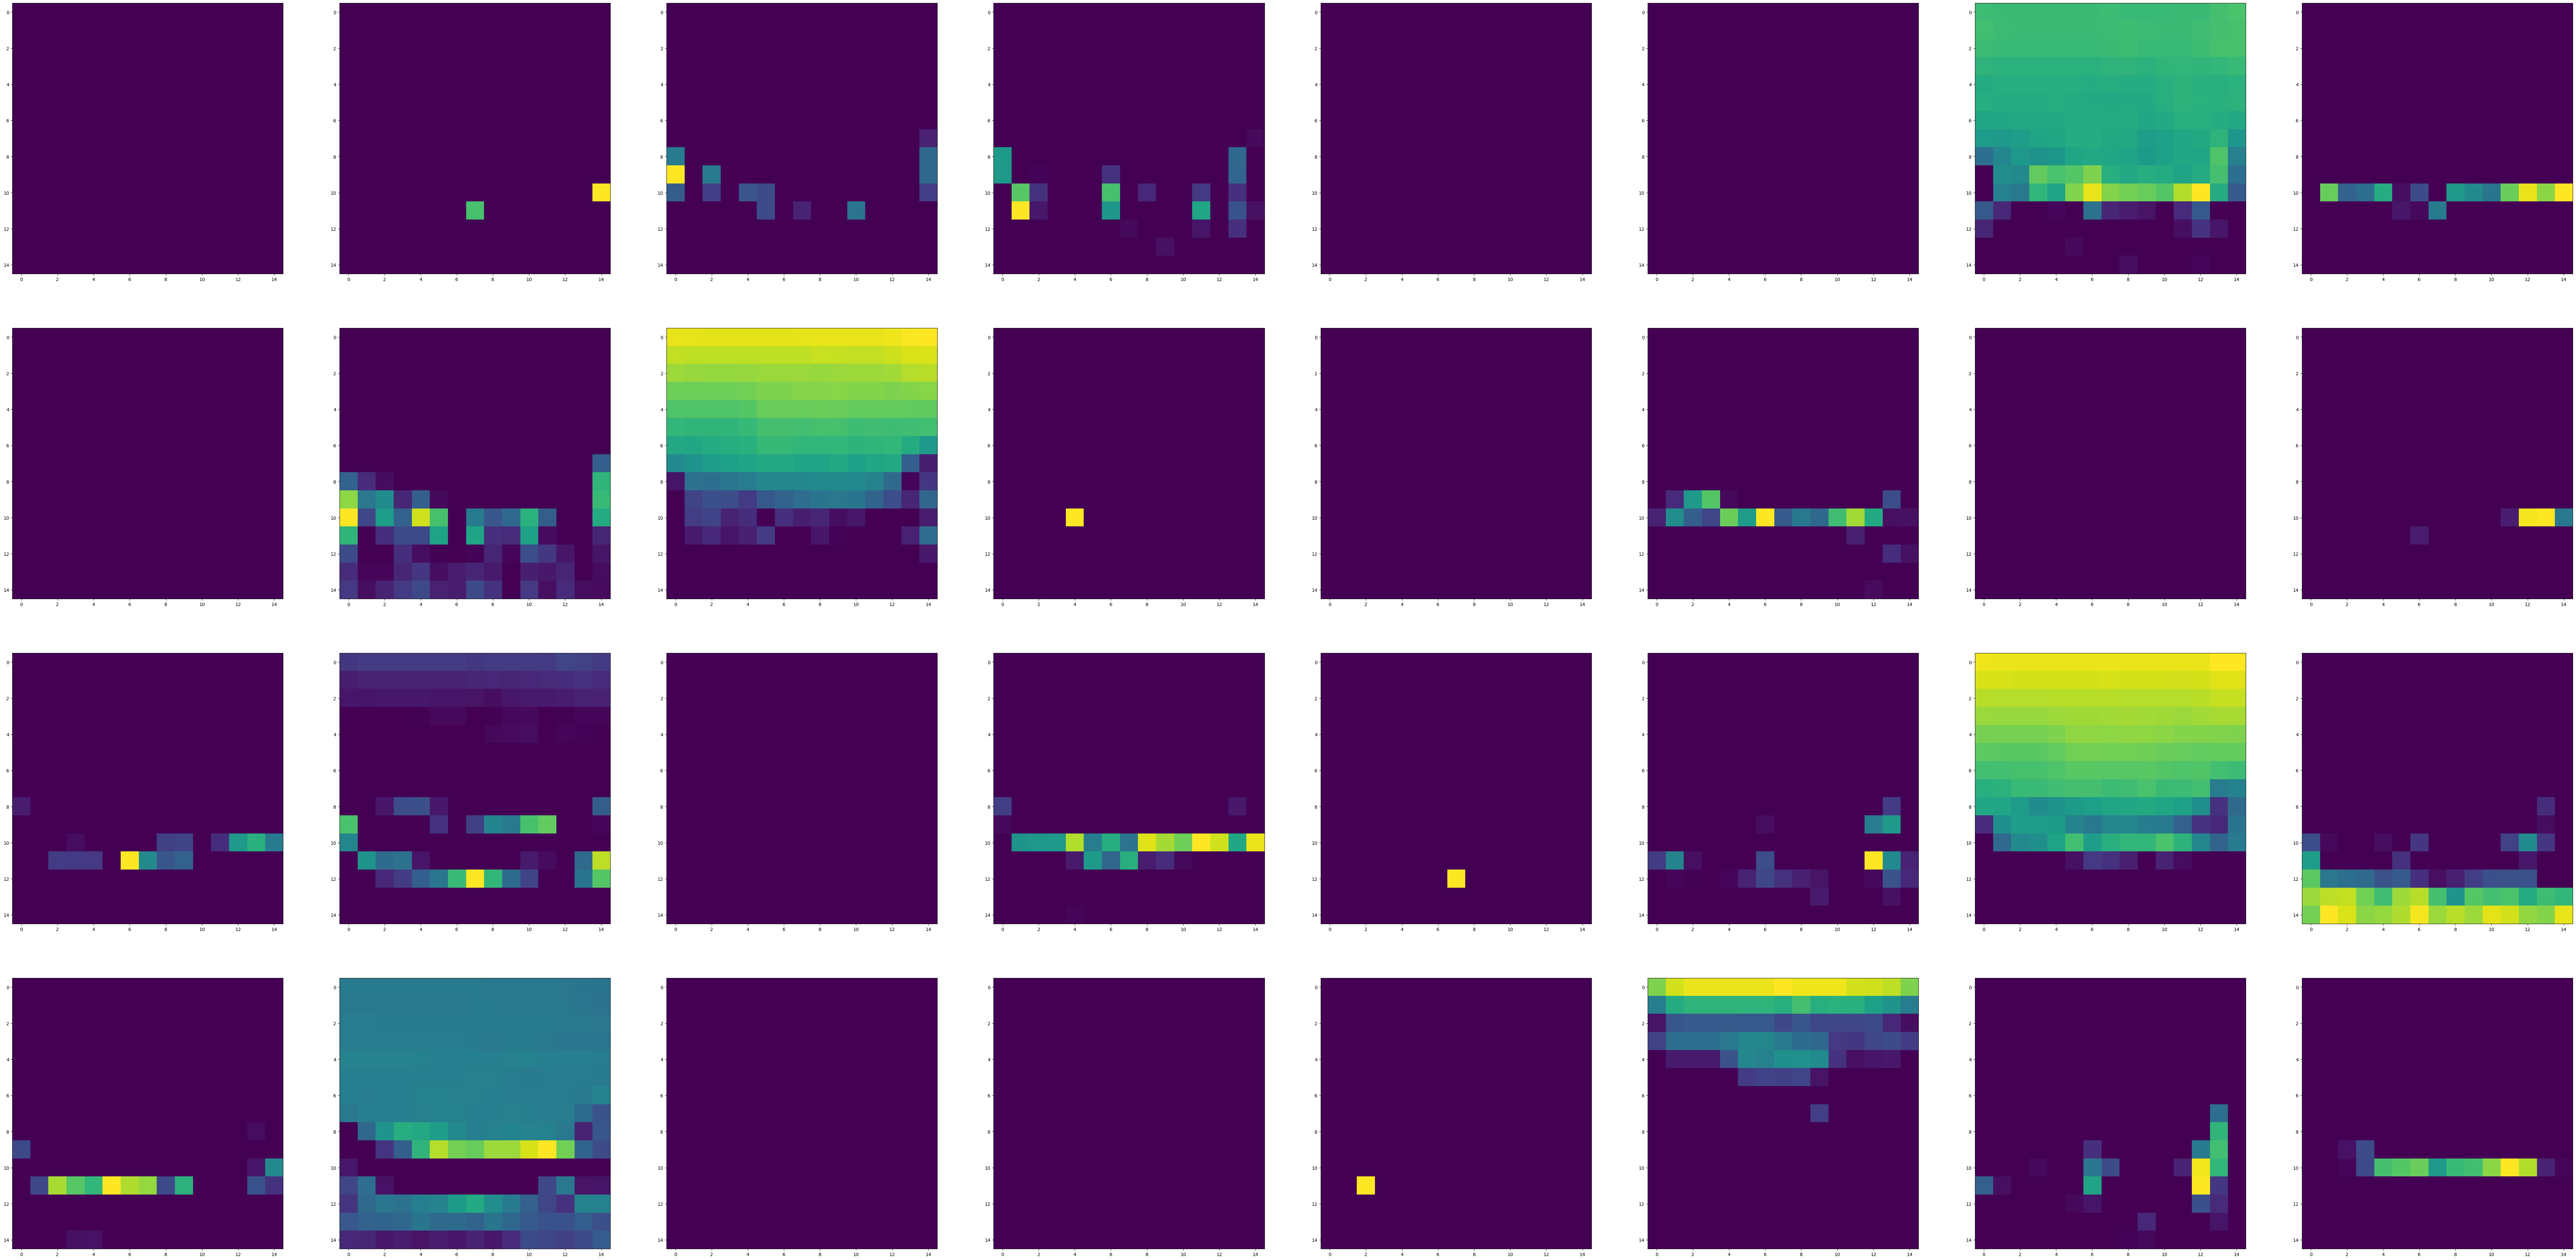

In [13]:
# Building the intermediate model
model2 = Model(inputs=model.inputs , outputs=model.layers[1].output)

# Visualizing the feature maps
features = model2(image)

fig = plt.figure(figsize=(100,100))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] )

plt.show()

Let's visualize feature maps of the other layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


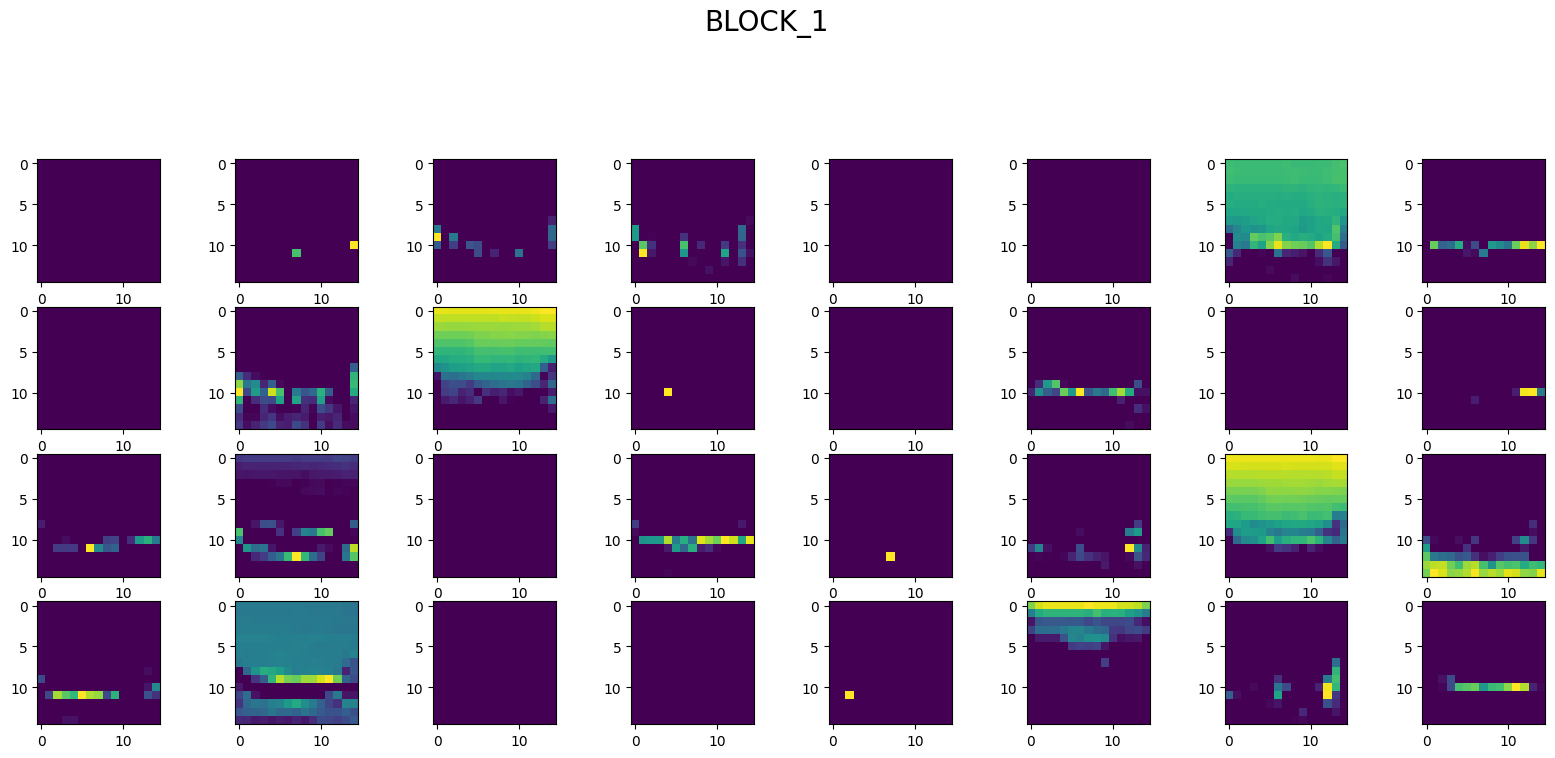

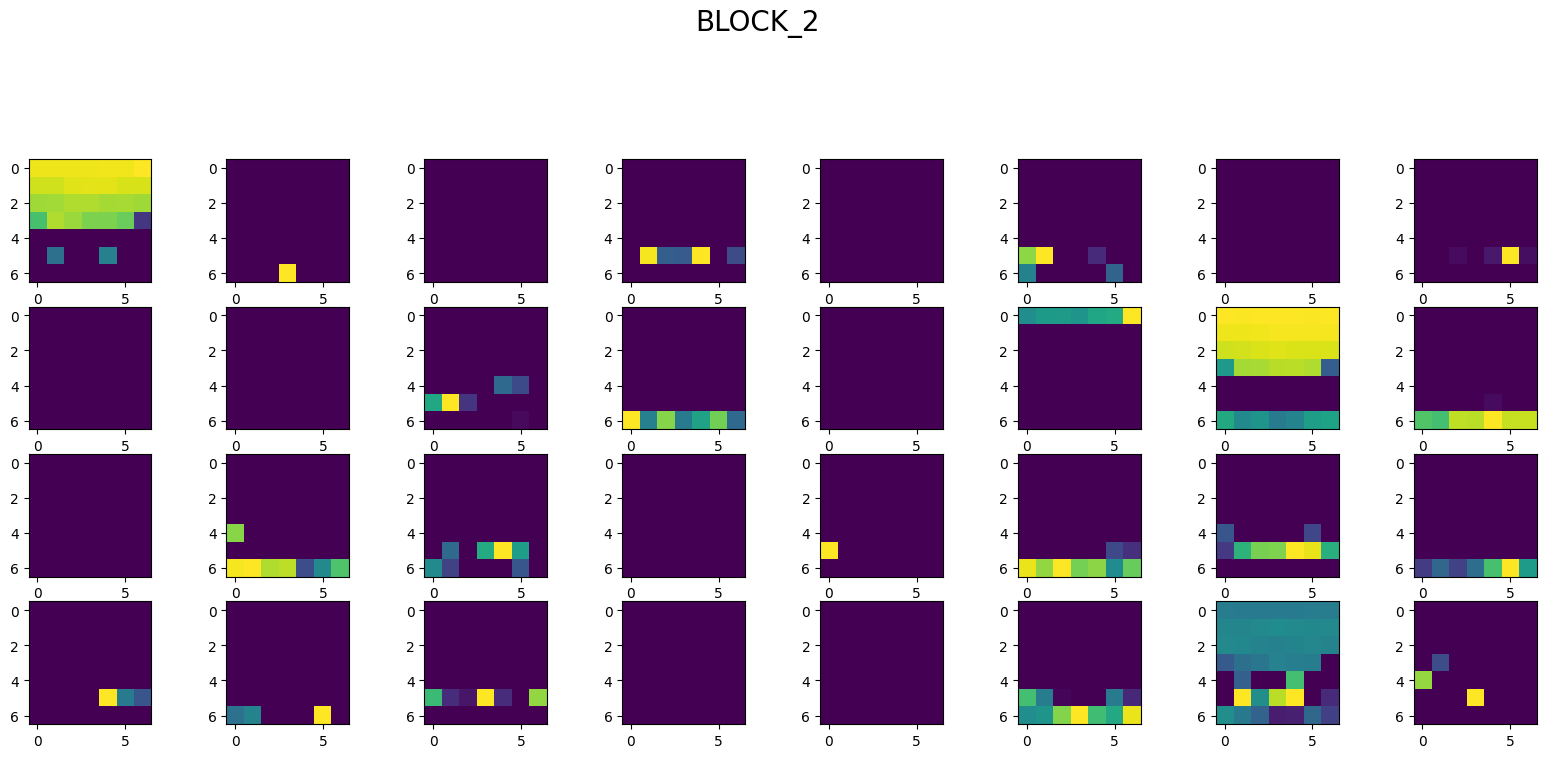

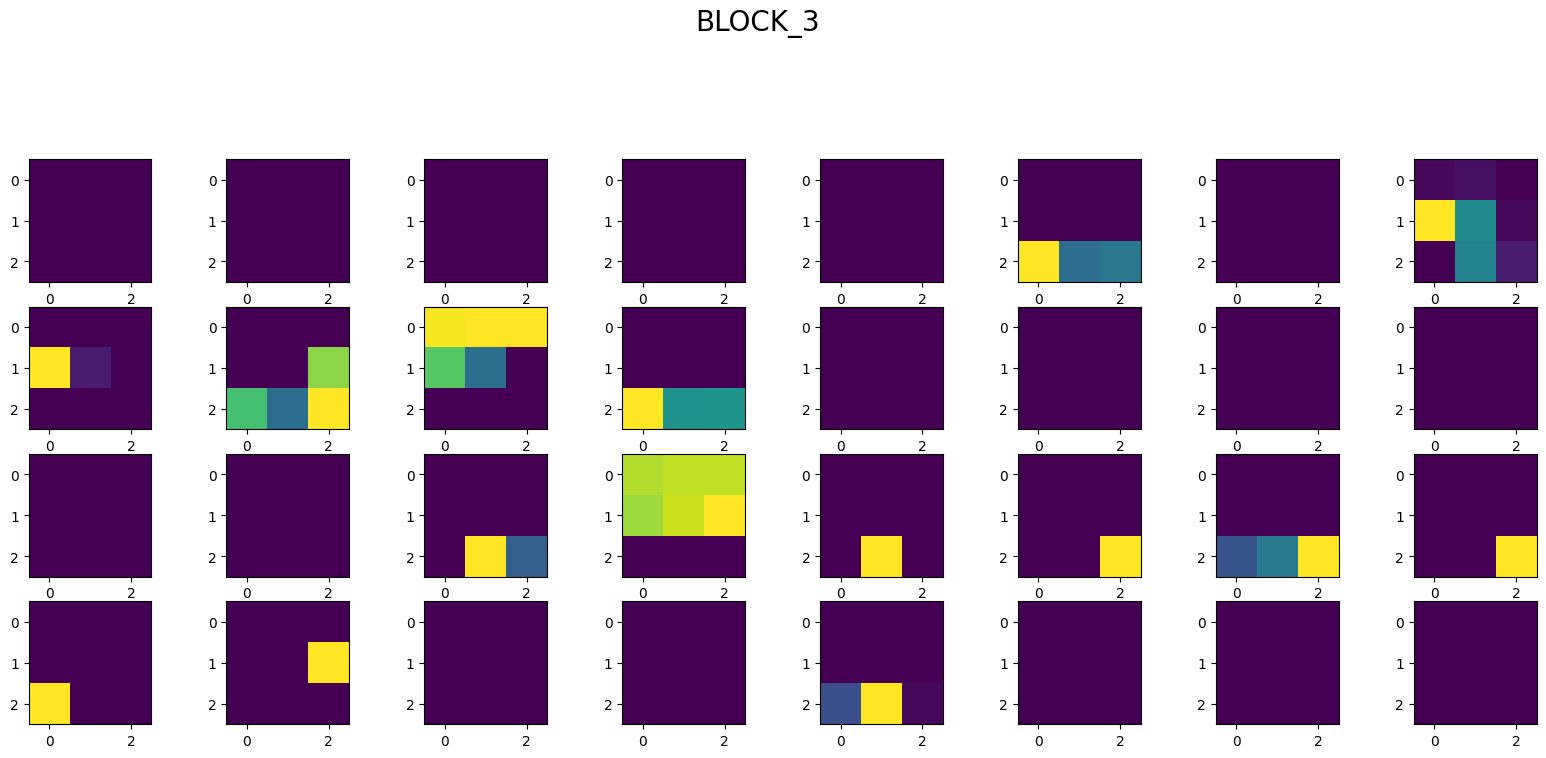

In [14]:
blocks = [ 1, 2, 3]
outputs = [model.layers[i].output for i in blocks]

model3 = Model( inputs= model.inputs, outputs = outputs)

feature_map = model3.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = plt.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1])

plt.show()